In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder


# Metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay



## to ignore waarning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')


raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df = raw_data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Visualization and Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df['isFraud'].unique()

array([0, 1])

In [ ]:
df.shape


(6362620, 11)

check if data is balanced or **not**

In [ ]:
frauds=df['isFraud'].value_counts()
frauds

,count
isFraud,
0,6354407
1,8213


make it even more **understandable**

Plotting Bar Graphs in order to visualize to see the distributions

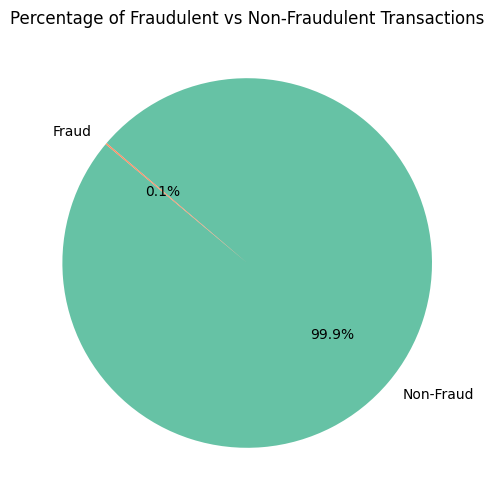

In [ ]:
import matplotlib.pyplot as plt


fraud_counts = df['isFraud'].value_counts()


labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
plt.pie(
    fraud_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62']
)
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


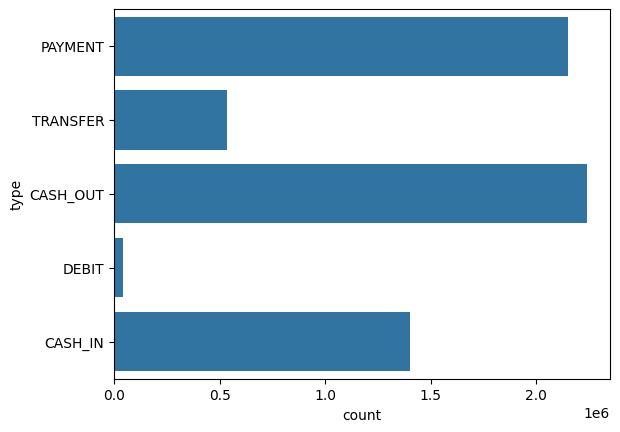

In [ ]:
sns.countplot(df['type'])
plt.show()

The most frequent transaction types are CASH-OUT and PAYMENT

In [ ]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))


dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116




Only **CASH-OUT and TRANSFER** transactions can be fraudulent.

**Checking Whether there is there any Transaction Amounts that are Negative or Zero**


In [ ]:
print("Number of transactions with amount is less 0?")
print(len(df[df.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df[df.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


**checking about these 16 transactions are of which type of payment methods they used and are they fraudulent trasacntions or not?**

In [ ]:

print("What type of transactions are they?")
print(df[df.amount<=0]['type'].value_counts())

print("Are all these marked as Fraud Transactions?")
df[df.amount<=0]['isFraud'].value_counts()[1] == len(df[df.amount<=0])

What type of transactions are they?
type
CASH_OUT    16
Name: count, dtype: int64
Are all these marked as Fraud Transactions?


True

In [ ]:
frauds=df['isFlaggedFraud'].value_counts()
frauds

,count
isFlaggedFraud,
0,6362604
1,16


**Checking whether the Falgged transactions are Fraudulent ones or not ?**


In [ ]:
df_temp = df[df.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(df_temp))

print("What type of transactions are they?")
print("\t",df_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",df_temp['isFraud'].value_counts()[1] == len(df_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


In this dataset, fraudulent activities often begin with a 'TRANSFER' to a fraudulent account, which is then followed by a 'CASH_OUT' from that account. To maintain data integrity, we will verify the presence of any duplicate instances of fraudulent accounts.

In [ ]:
print('\nWithin fraudulent transactions, are there destinations for TRANSFERS \
that are also originators for CASH_OUTs? {}'.format(\
(dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any())) # False
dfNotFraud = df.loc[df.isFraud == 0]


Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


Fraudulent transactions are nearly equally likely to be either CASH_OUT or TRANSFER. Therefore, **I am grouping all other payment types (PAYMENT, CASH-IN, and DEBIT) into a single category called OTHERS**, excluding CASH_OUT and TRANSFER.

**Fraud and Non-Fraud Transactions Count by Time Step**

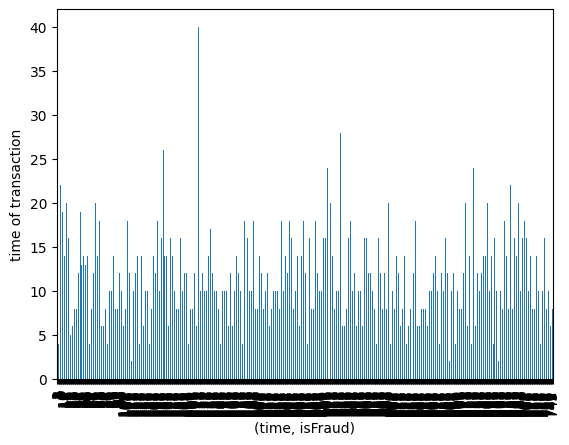

In [ ]:
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

The fraud transactions are almost uniformly spread out across time steps, so this variable is not giving us any information which might impact the target variable. so its better to drop this variable.

**Correlation check**

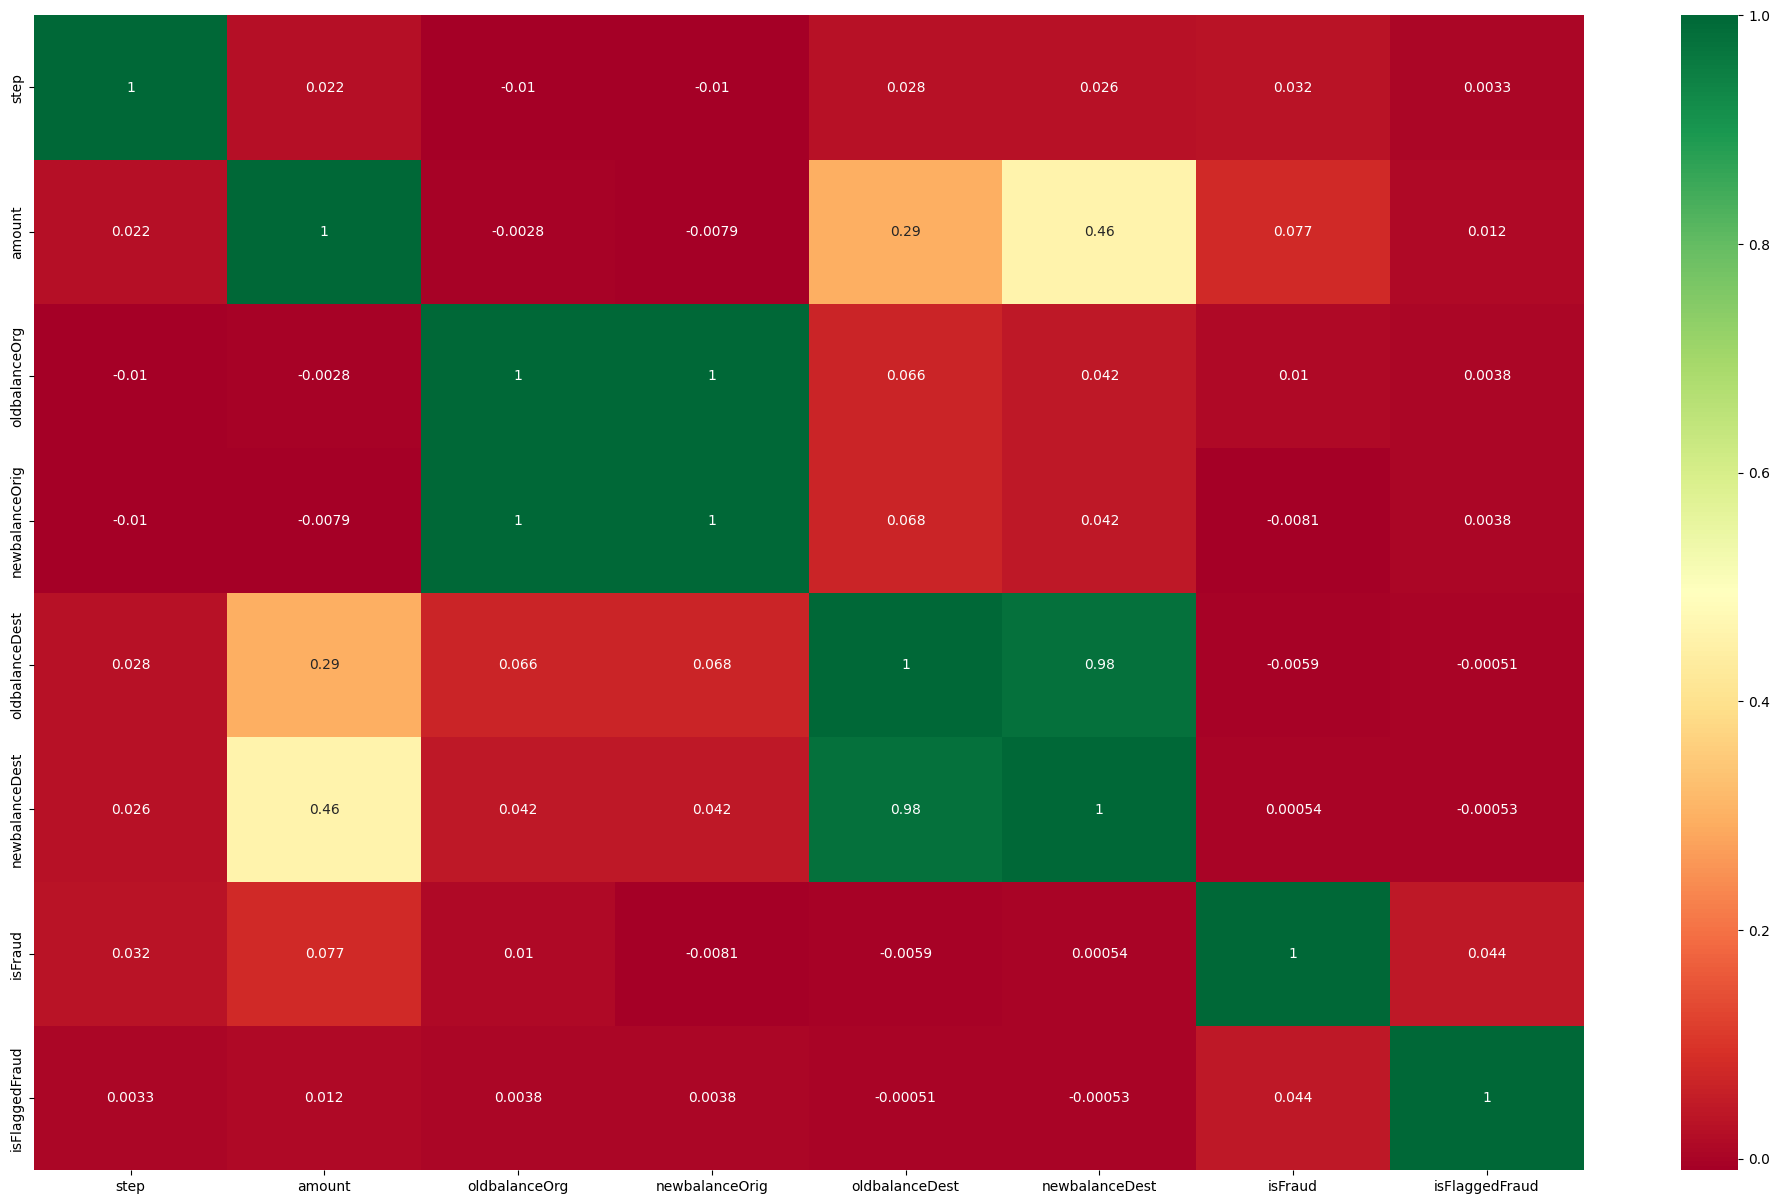

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

corr = numerical_df.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

We observe that some independent variables are correlated with each other.

The input features oldbalanceDest and newbalanceDest show correlation, so one needs to be dropped. To decide which feature to remove, we examine their correlation with the target variable (isFraud):

oldbalanceDest has a stronger negative correlation (-0.0059) compared to newbalanceDest (0.00054).
Thus, **we drop newbalanceDest.**
Similarly, oldbalanceOrig and newbalanceOrig are also correlated. Here, newbalanceOrig has a stronger negative correlation (-0.0081) with the target variable than oldbalanceOrig (0.01).
As a result, **we drop oldbalanceOrg.**

**Finally, the features dropped are newbalanceDest and oldbalanceOrg.**

# Data Preprocessing

**Combining types of payments**

In [7]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [8]:
df['type'] = df['type'].map(type_map)

df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

**Outliers Analysis**

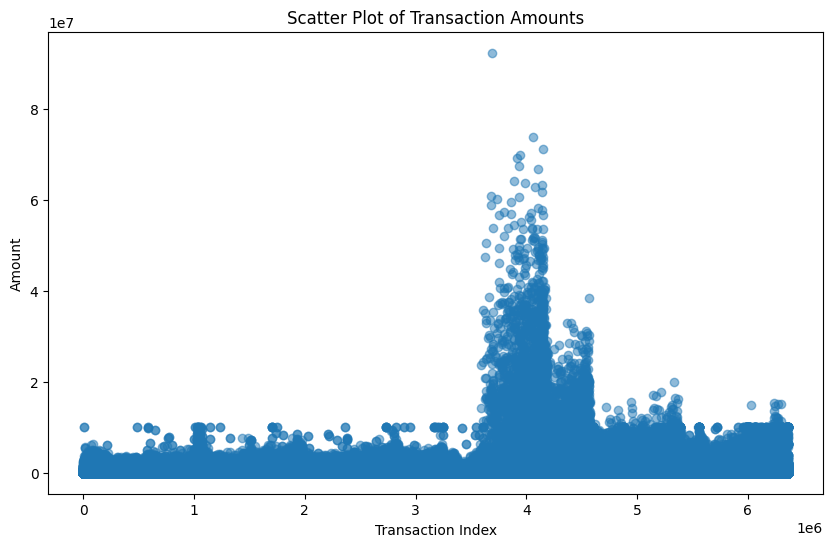

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['amount'], alpha=0.5)
plt.xlabel('Transaction Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Transaction Amounts')
plt.show()

The few points above the dense area are likely outliers, as they show unusually high transaction amounts compared to the majority.
These high-value transactions could **be indicators of suspicious or fraudulent activity**, especially if they deviate significantly from normal behavior.

In [10]:

high_value_threshold = df['amount'].quantile(0.66)


df['is_high_value'] = df['amount'] > high_value_threshold


print(df[['amount', 'is_high_value']].head())


     amount  is_high_value
0   9839.64          False
1   1864.28          False
2    181.00          False
3    181.00          False
4  11668.14          False


In [11]:
high_value_transactions = df[df['is_high_value']]

fraud_rate_high_value = high_value_transactions['isFraud'].mean()

print(f"Fraud Rate among High-Value Transactions: {fraud_rate_high_value * 100:.2f}%")

Fraud Rate among High-Value Transactions: 0.27%


In [12]:
max_amount = df['amount'].max()
fraud_status = df[df['amount'] == max_amount]['isFraud'].iloc[0]
if fraud_status == 1:
    print(f"The maximum amount of {max_amount} is fraudulent.")
else:
    print(f"The maximum amount of {max_amount} is not fraudulent.")

The maximum amount of 92445516.64 is not fraudulent.


In [13]:
correlation = df['amount'].corr(df['isFraud'])
print(f"Correlation between amount and fraud: {correlation}")

Correlation between amount and fraud: 0.0766884288402926


The correlation between `amount` and `isFraud` is 0.077, indicating a very weak relationship between these two features. This low correlation suggests that `amount` has minimal influence on the likelihood of a transaction being classified as fraud. Therefore, removing outliers in the `amount` feature is unlikely to impact the model's performance significantly, making it a reasonable step to simplify the dataset.

In [14]:
df_cleaned = df[~((df['amount'] > high_value_threshold) & (df['isFraud'] == 0))]
df_cleaned

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_high_value
0,1,OTHERS,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False
1,1,OTHERS,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False
4,1,OTHERS,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,True


In [15]:
df_cleaned = df_cleaned.drop('is_high_value', axis=1)

In [16]:
column_names = df_cleaned.columns
print(column_names)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [17]:
frauds=df_cleaned['isFraud'].value_counts()
frauds

,count
isFraud,
0,4196998
1,8213


i only dropped the outliers where `isFraud` is 0 , and for the rest , im going to keep it , and only change it for the algorithms that are sensitive for outliers. like clustering or linear regression



**drop unecessary columns**

In [18]:
X = df_cleaned.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest
0,OTHERS,9839.64,160296.36,0.0
1,OTHERS,1864.28,19384.72,0.0
2,TRANSFER,181.00,0.00,0.0
3,CASH_OUT,181.00,0.00,21182.0
4,OTHERS,11668.14,29885.86,0.0


In [19]:
y = df_cleaned['isFraud']
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [20]:
y.value_counts()

,count
isFraud,
0,4196998
1,8213


**Handling Categorical - Nominal Features (Encoding)**

---



---



In [21]:
dummies_type = pd.get_dummies(X['type'], prefix='type', drop_first=True)

In [22]:
dummies_type = dummies_type.astype(int)
dummies_type

,type_OTHERS,type_TRANSFER
0,1,0
1,1,0
2,0,1
3,0,0
4,1,0
...,...,...
6362615,0,0
6362616,0,1
6362617,0,0
6362618,0,1


In [23]:
X= pd.concat([X, dummies_type], axis=1)

X.head()

,type,amount,newbalanceOrig,oldbalanceDest,type_OTHERS,type_TRANSFER
0,OTHERS,9839.64,160296.36,0.0,1,0
1,OTHERS,1864.28,19384.72,0.0,1,0
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,0
4,OTHERS,11668.14,29885.86,0.0,1,0


In [24]:
X = X.drop(columns=['type'])

X.head()

,amount,newbalanceOrig,oldbalanceDest,type_OTHERS,type_TRANSFER
0,9839.64,160296.36,0.0,1,0
1,1864.28,19384.72,0.0,1,0
2,181.00,0.00,0.0,0,1
3,181.00,0.00,21182.0,0,0
4,11668.14,29885.86,0.0,1,0


**Undersampling**

The dataset is highly imbalanced, with a much larger number of non-fraudulent transactions compared to fraudulent ones. To address this, we apply RandomUnderSampler from the imblearn library, which randomly reduces the number of non-fraudulent transactions to match the count of fraudulent ones. This creates a balanced dataset (X_resampled and y_resampled), allowing the model to learn more effectively from both classes and reducing the risk of bias toward the majority (non-fraudulent) class. Setting random_state=42 ensures consistent results across runs.

**First**, split the data into train and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [27]:
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

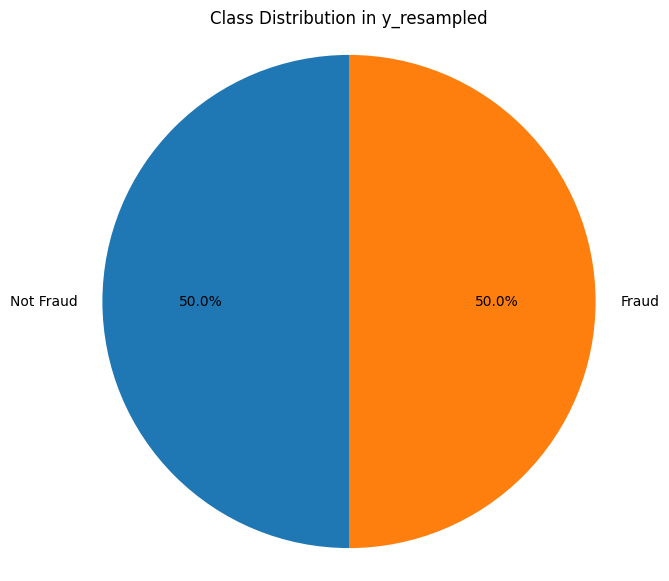

In [28]:
from collections import Counter

counts = Counter(y_resampled)

labels = ['Fraud' if label == 1 else 'Not Fraud' for label in counts.keys()]
values = list(counts.values())

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in y_resampled')
plt.axis('equal')
plt.show()

The resampled dataset now has a 50/50 balance, with equal numbers of fraudulent and non-fraudulent transactions, enabling the model to learn from both classes without bias.

**SCALER**

The StandardScaler is applied to standardize the resampled dataset by scaling features to have a mean of 0 and a standard deviation of 1. This normalization helps improve model performance and ensures consistency across features

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X_resampled)

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_resampled)


In [31]:
X_test_scaled = scaler.transform(X_test_resampled)

In [32]:
X_train_df = pd.DataFrame(X_train_scaled)
X_train_df.head()

,0,1,2,3,4
0,-0.367366,-0.189285,0.016492,-0.735323,-0.591008
1,-0.359791,-0.189285,-0.204710,-0.735323,-0.591008
2,-0.383750,-0.189285,-0.201589,-0.735323,-0.591008
3,-0.399824,-0.189285,-0.273889,1.359946,-0.591008
4,-0.401179,-0.184982,-0.273889,1.359946,-0.591008


In [33]:
X_train_df.columns = ['amount', 'newbalanceOrig', 'oldbalanceDest', 'type_OTHERS', 'type_TRANSFER']

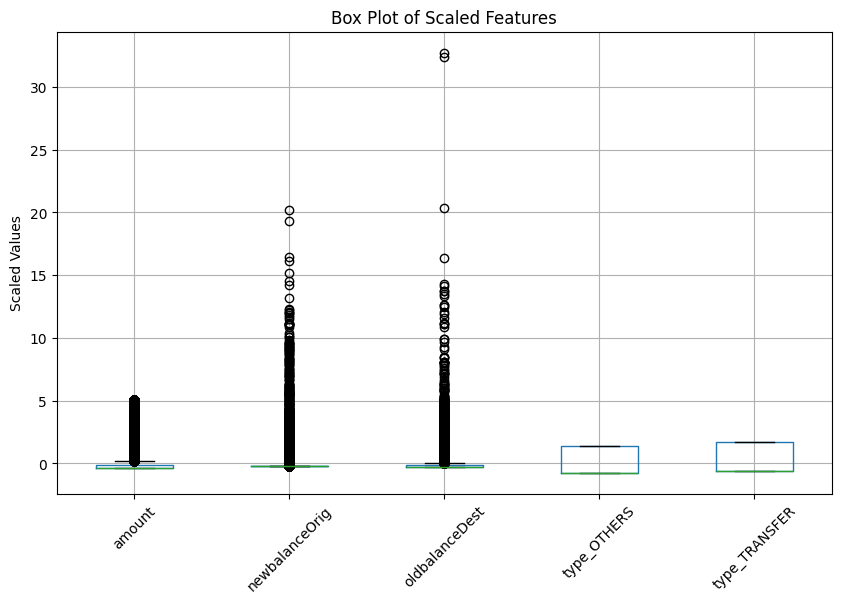

In [34]:
# Plot boxplot for the scaled features
plt.figure(figsize=(10, 6))
X_train_df.boxplot()
plt.title("Box Plot of Scaled Features")
plt.xticks(rotation=45)
plt.ylabel("Scaled Values")
plt.show()

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_resampled, test_size=0.20, random_state=42)

## Machine Learning To Detect Fraud
**Logistic Regression**

Logistic Regression is used to model the probability of a transaction being fraudulent or non-fraudulent. This algorithm outputs a probability score for each class, allowing us to classify transactions based on their likelihood of being fraud. It is especially suited for binary classification tasks like fraud detection, where it effectively separates the two classes.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**K-Nearest Neighbors (KNN)**K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm used for classification by assigning a class to an input based on the majority class of its nearest neighbors. In fraud detection, KNN compares a transaction to similar past ones, classifying it as fraudulent or non-fraudulent. It is effective for complex, non-linear decision boundaries but can be computationally expensive with large datasets.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the KNN model with a chosen number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree and Random Forest** Decision Tree is a classification algorithm that splits data into subsets based on feature values, creating a tree-like structure. Each node represents a decision, and the leaves indicate the predicted class. In fraud detection, Decision Trees can easily separate fraudulent and non-fraudulent transactions, providing clear interpretability. However, they can overfit on small or noisy datasets.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Random Forest is an ensemble method that combines multiple Decision Trees to improve accuracy and reduce overfitting. It builds many trees on random subsets of the data and averages their predictions. In fraud detection, Random Forest is more robust than a single Decision Tree, handling complex patterns and noisy data more effectively.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Support Vector Machine (SVM)** Support Vector Machine (SVM) is a classification algorithm that finds the optimal hyperplane to separate data into different classes. It maximizes the margin between the classes, making it effective for high-dimensional data. In fraud detection, SVM can efficiently classify transactions as fraudulent or non-fraudulent, especially when the decision boundary is complex. However, it can be computationally intensive, especially with large datasets.

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SVM model with a linear kernel (you can adjust kernel type)
svm_model = SVC(probability=True, random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

**Gradient Boosting (XGBoost)** Gradient Boosting (XGBoost) is an ensemble learning method that builds multiple decision trees sequentially, with each tree correcting the errors of the previous one. It focuses on optimizing performance through gradient descent and is highly effective for both classification and regression tasks. In fraud detection, XGBoost can accurately classify transactions as fraudulent or non-fraudulent by learning complex patterns in the data, handling imbalances, and providing strong predictive power. However, it can be computationally expensive and sensitive to hyperparameters.

In [ ]:
!pip install xgboost

In [41]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Evaluating Logistic Regression...


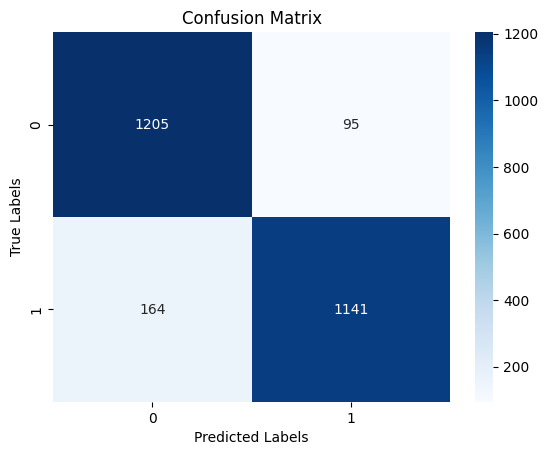

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90
Confusion Matrix:
[[1205   95]
 [ 164 1141]]

Evaluating Random Forest...


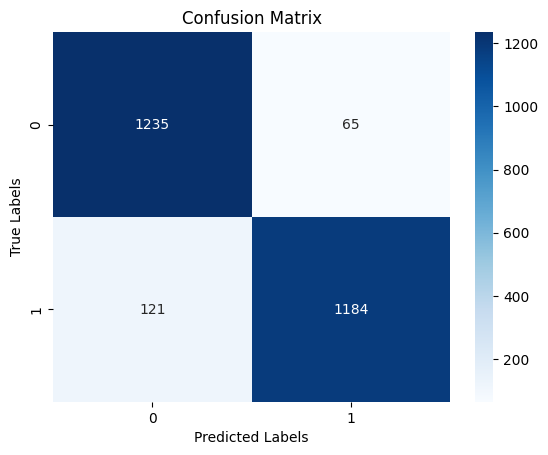

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
Confusion Matrix:
[[1235   65]
 [ 121 1184]]

Evaluating Support Vector Machine...


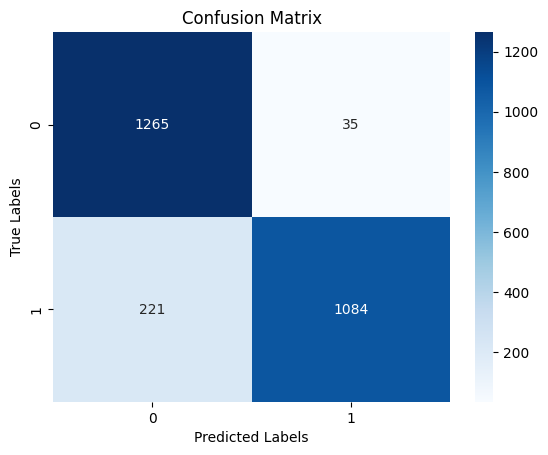

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-Score: 0.90
Confusion Matrix:
[[1265   35]
 [ 221 1084]]

Evaluating K-Nearest Neighbors...


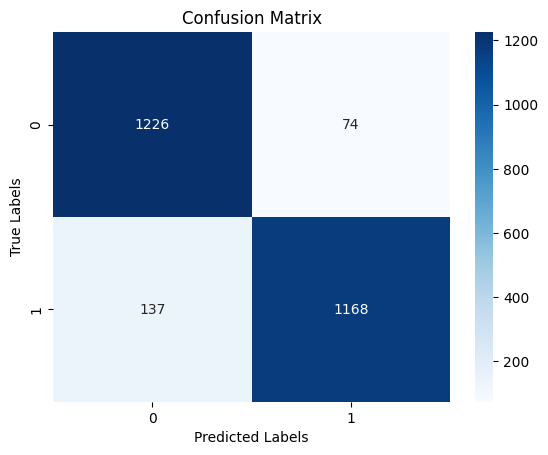

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
Confusion Matrix:
[[1226   74]
 [ 137 1168]]

Evaluating Decision Tree...


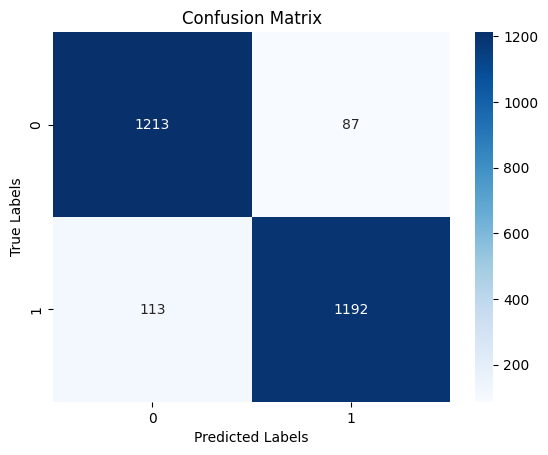

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
Confusion Matrix:
[[1213   87]
 [ 113 1192]]

Evaluating XGBoost...


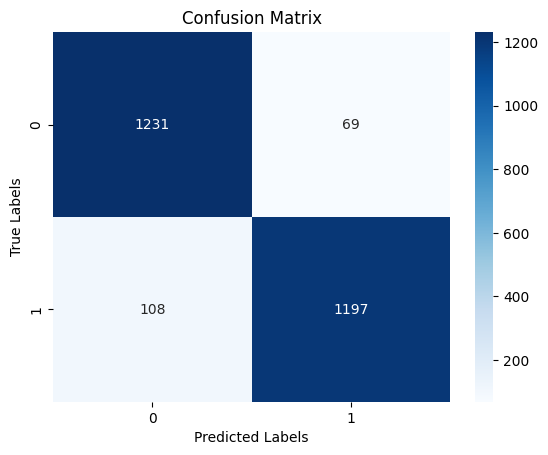

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
Confusion Matrix:
[[1231   69]
 [ 108 1197]]

Model Comparison on Validation Set:
                        Accuracy  Precision    Recall  F1-Score
XGBoost                 0.932054   0.932445  0.932054  0.932040
Random Forest           0.928599   0.929398  0.928599  0.928569
Decision Tree           0.923225   0.923396  0.923225  0.923218
K-Nearest Neighbors     0.919002   0.919992  0.919002  0.918958
Support Vector Machine  0.901727   0.910113  0.901727  0.901238
Logistic Regression     0.900576   0.901713  0.900576  0.900511


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

fitted_models = {
    "Logistic Regression": model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "K-Nearest Neighbors": knn_model,
    "Decision Tree": dt_model,
    "XGBoost": xgb_model
}

evaluation_results = {}

# Evaluate each model on the validation set
for model_name, fitted_model in fitted_models.items():
    print(f"\nEvaluating {model_name}...")
    # Predict on validation set
    y_pred = fitted_model.predict(X_valid)

    # Compute metrics
    accuracy = accuracy_score(y_valid, y_pred)
    classification_rep = classification_report(y_valid, y_pred, output_dict=True)
    cm = confusion_matrix(y_valid, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": classification_rep['weighted avg']['precision'],
        "Recall": classification_rep['weighted avg']['recall'],
        "F1-Score": classification_rep['weighted avg']['f1-score'],
        "Confusion Matrix": cm
    }

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {classification_rep['weighted avg']['precision']:.2f}")
    print(f"Recall: {classification_rep['weighted avg']['recall']:.2f}")
    print(f"F1-Score: {classification_rep['weighted avg']['f1-score']:.2f}")
    print(f"Confusion Matrix:\n{cm}")

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame({
    model_name: {
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-Score": metrics["F1-Score"]
    }
    for model_name, metrics in evaluation_results.items()
}).T

results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nModel Comparison on Validation Set:")
print(results_df)

The Best model we got is XGBoost so we need to check the best fitting hyperparameters

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nMeilleurs paramètres pour XGBoost: {best_params}")
print(f"Précision moyenne avec les meilleurs paramètres : {best_score * 100:.2f}%")



Meilleurs paramètres pour XGBoost: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Précision moyenne avec les meilleurs paramètres : 93.40%


### XGBoost(best model) with the new Hyperparameters

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1702
           1       0.96      0.92      0.94      1702

    accuracy                           0.94      3404
   macro avg       0.94      0.94      0.94      3404
weighted avg       0.94      0.94      0.94      3404



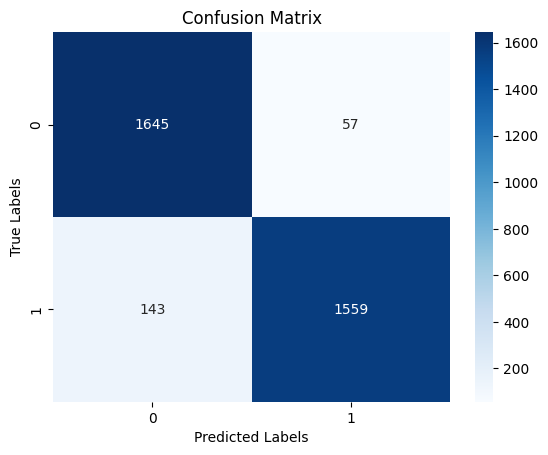

In [46]:
# Initialize the XGBoost model with the best parameters
xgb_model = xgb.XGBClassifier(
    max_depth=None,          # Optimal tree depth
    min_samples_split=2,     # Minimum samples required to split
    n_estimators=50,         # Number of trees in the ensemble
    random_state=42,
    use_label_encoder=False
)
# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Classification report and confusion matrix
print(classification_report(y_test_resampled, y_pred))
cm = confusion_matrix(y_test_resampled, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We can clearly distinguish that the `Precision`, `Accuracy`, `Recall`and `F1-score` increased

**Neural network** :Building Artificial Neural Network

In [47]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    # input layer + hidden layer 1
    keras.layers.Dense(300, input_shape=(5, ), activation='relu'),
    # hidden layer 2
    keras.layers.Dense(150, activation='relu'),
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8474 - loss: 0.4098
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8930 - loss: 0.2079
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9015 - loss: 0.1893
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8964 - loss: 0.1890
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9100 - loss: 0.1781
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9065 - loss: 0.1732
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9110 - loss: 0.1723
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9122 - loss: 0.1744
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9135 - loss: 0.1716
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9095 - loss: 0.1774


In [48]:
print("\nEvaluating on Validation Set:")
val_loss, val_accuracy = model.evaluate(X_valid, y_valid)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating on Validation Set:
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9089 - loss: 0.1619
Validation Accuracy: 90.44%


In [49]:
print("\nEvaluating on Test Set:")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_resampled)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Evaluating on Test Set:
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9131 - loss: 0.1783
Test Accuracy: 91.16%


In [50]:
pred = model.predict(X_test_scaled)
print("\nPredictions:\n", pred)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Predictions:
 [[7.9302496e-05]
 [8.4946689e-05]
 [3.1661871e-01]
 ...
 [5.2071691e-01]
 [3.9413515e-01]
 [9.9978191e-01]]


In [51]:
binary_pred = (pred > 0.5).astype('int')

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_resampled, binary_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1702
           1       0.91      0.91      0.91      1702

    accuracy                           0.91      3404
   macro avg       0.91      0.91      0.91      3404
weighted avg       0.91      0.91      0.91      3404



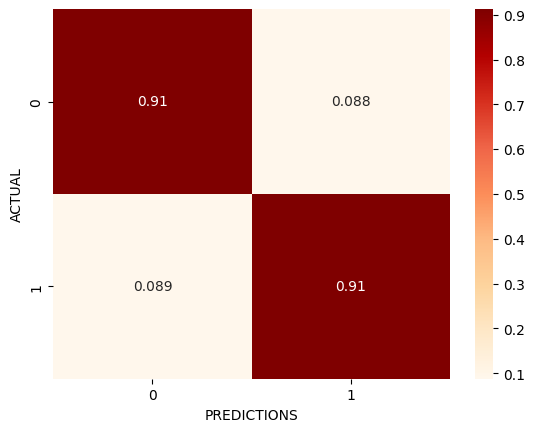

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


cf = confusion_matrix(y_test_resampled, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');